In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
train=pd.read_csv("trainp3.csv")

In [21]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression# for Logistic Regression algorithm
from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.ensemble import RandomForestClassifier # A combine model of many decision trees
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [22]:
train=train.replace(-1, np.nan)

In [23]:
train=train.fillna(train.mean(), inplace=True)

In [24]:
train.describe()

,Unnamed: 0,House ID,bathrooms,bedrooms,blessings,builder,capital_distance,dateb,dining_rooms,dock_distance,...,holy_tree,king_visited,knights_house_distance,location,market_distance,renovation,river_distance,sorceror_cursed,tower_distance,golden_grains
count,16500.000000,1.650000e+04,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,0.0,16500.000000,16500.000000,...,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,1.650000e+04
mean,8249.500000,1.848856e+09,3.007209,3.001514,115.142545,4.008338,42.674021,NaN,3.001615,46.305520,...,0.870107,0.085030,53.169633,2.671387,48.715817,0.195817,30.288848,0.850664,101.110421,1.306901e+06
std,4763.284056,1.898740e+04,0.796044,0.797443,34.806516,2.376687,33.489311,NaN,0.774775,33.338223,...,0.301089,0.278935,33.490791,0.889960,32.370184,0.376742,22.036027,0.345482,65.285441,1.628483e+05
min,0.000000,1.848823e+09,2.000000,2.000000,3.000000,0.000000,0.000714,NaN,2.000000,0.000288,...,0.000000,0.000000,10.035601,1.000000,0.011985,0.000000,0.007765,0.000000,0.012093,6.250830e+05
25%,4124.750000,1.848840e+09,2.000000,2.000000,90.000000,3.000000,15.730341,NaN,2.000000,19.818220,...,0.870107,0.000000,26.223188,2.000000,23.922671,0.000000,12.515697,1.000000,48.748405,1.208923e+06
50%,8249.500000,1.848856e+09,3.000000,3.000000,124.000000,3.000000,36.092090,NaN,3.000000,43.760487,...,1.000000,0.000000,46.584263,3.000000,48.715817,0.000000,25.352928,1.000000,94.973900,1.330423e+06
75%,12374.250000,1.848873e+09,4.000000,4.000000,144.000000,6.000000,61.759625,NaN,4.000000,64.226306,...,1.000000,0.000000,72.343745,3.000000,65.053574,0.195817,44.503404,1.000000,144.173678,1.425944e+06
max,16499.000000,1.848889e+09,4.000000,4.000000,160.000000,9.000000,156.893349,NaN,4.000000,157.658673,...,1.000000,1.000000,167.131365,4.000000,157.857240,1.000000,99.260600,1.000000,297.334188,1.747559e+06


In [25]:
train

,Unnamed: 0,House ID,bathrooms,bedrooms,blessings,builder,capital_distance,dateb,dining_rooms,dock_distance,...,holy_tree,king_visited,knights_house_distance,location,market_distance,renovation,river_distance,sorceror_cursed,tower_distance,golden_grains
0,0,1.848823e+09,3.007209,4.000000,160.0,1.000000,0.256239,NaN,3.000000,138.600639,...,1.000000,0.0,10.505662,4.000000,69.486467,0.000000,63.109038,1.000000,14.394903,1470912.0
1,1,1.848823e+09,3.007209,4.000000,133.0,8.000000,26.882222,NaN,2.000000,16.254871,...,0.870107,1.0,37.249456,3.000000,34.145238,0.000000,53.249336,1.000000,101.052598,1241030.0
2,2,1.848823e+09,2.000000,3.001514,24.0,4.008338,136.448973,NaN,3.000000,6.555428,...,1.000000,0.0,146.553349,2.671387,78.445508,0.000000,72.245533,1.000000,88.480988,838723.0
3,3,1.848824e+09,2.000000,2.000000,140.0,4.000000,19.885265,NaN,2.000000,79.724550,...,0.870107,0.0,29.921162,3.000000,92.698917,0.000000,8.059939,1.000000,22.395136,1267804.0
4,4,1.848824e+09,2.000000,2.000000,159.0,3.000000,0.519507,NaN,3.000000,101.541256,...,1.000000,0.0,10.855780,3.000000,3.605055,0.000000,35.706541,1.000000,81.449646,1497166.0
5,5,1.848824e+09,4.000000,2.000000,152.0,3.000000,7.575922,NaN,3.001615,48.601612,...,1.000000,0.0,18.378692,4.000000,32.236989,0.000000,72.111768,1.000000,47.180399,1428460.0
6,6,1.848824e+09,2.000000,2.000000,158.0,9.000000,1.955970,NaN,3.000000,32.624227,...,1.000000,0.0,12.389964,2.000000,88.485147,0.000000,33.929217,1.000000,77.692256,1453568.0
7,7,1.848824e+09,3.000000,3.000000,144.0,2.000000,15.776747,NaN,3.001615,84.170405,...,1.000000,0.0,26.231919,2.000000,62.816373,0.000000,27.379252,1.000000,51.870346,1381186.0
8,8,1.848824e+09,3.000000,3.000000,37.0,1.000000,122.930753,NaN,4.000000,10.998322,...,1.000000,0.0,132.934312,3.000000,63.794375,0.000000,17.045949,1.000000,53.019891,1052137.0
9,9,1.848824e+09,3.000000,3.000000,157.0,0.000000,2.809867,NaN,3.000000,60.265361,...,1.000000,0.0,13.188134,2.000000,23.701329,0.195817,36.934980,1.000000,89.658984,1473032.0


In [26]:
train.dtypes

Unnamed: 0                  int64
House ID                  float64
bathrooms                 float64
bedrooms                  float64
blessings                 float64
builder                   float64
capital_distance          float64
dateb                     float64
dining_rooms              float64
dock_distance             float64
farm                      float64
garden                    float64
holy_tree                 float64
king_visited              float64
knights_house_distance    float64
location                  float64
market_distance           float64
renovation                float64
river_distance            float64
sorceror_cursed           float64
tower_distance            float64
golden_grains             float64
dtype: object

In [27]:
X = train[['House ID','builder','garden','dock_distance','capital_distance','market_distance','tower_distance','river_distance','renovation','dining_rooms','bedrooms','bathrooms','king_visited','sorceror_cursed','blessings','farm','location','holy_tree','knights_house_distance','golden_grains']]
Y = train['golden_grains']

In [28]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
sns.set(style="white", color_codes=True)

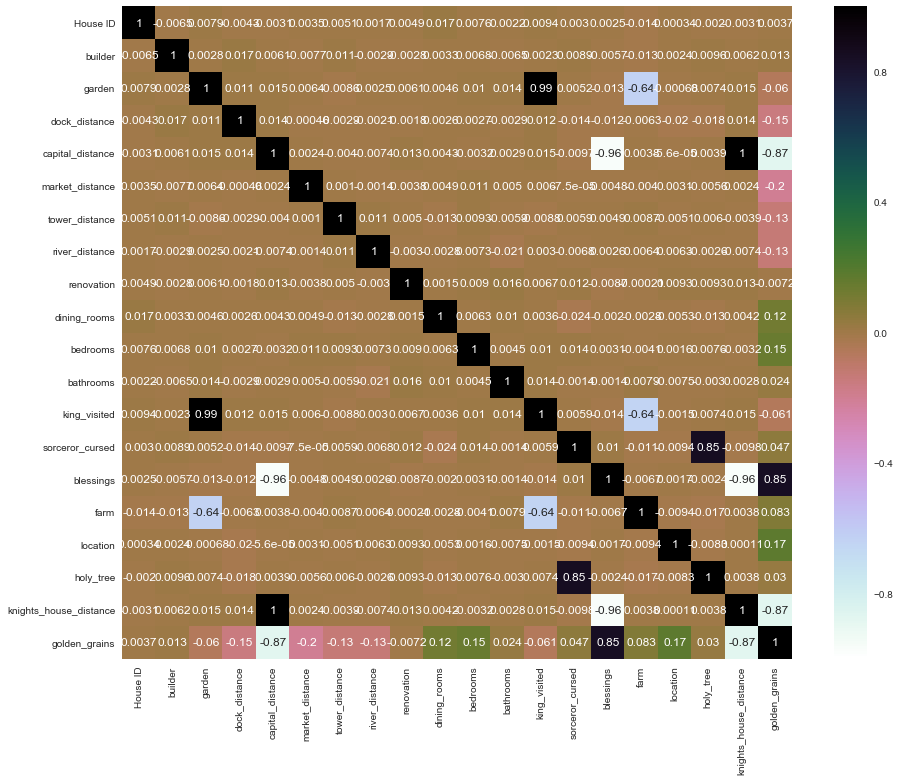

In [29]:
plt.figure(figsize=(15,12)) 
sns.heatmap(X.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [11]:
train1, test1 = train_test_split(train, test_size = 0.25, random_state=1212)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train1.shape)
print(test1.shape)

(12375, 22)
(4125, 22)


In [12]:
features2=['builder','dock_distance','market_distance','tower_distance','river_distance','renovation','dining_rooms','bedrooms','bathrooms','king_visited','blessings','farm','location','holy_tree','knights_house_distance']
features=['builder','garden','dock_distance','capital_distance','market_distance','tower_distance','river_distance','renovation','dining_rooms','bedrooms','bathrooms','king_visited','sorceror_cursed','blessings','farm','location','holy_tree','knights_house_distance']

In [13]:
train_X = train1[features2]# taking the training data features
train_y = train1.golden_grains# output of our training data
test_X = test1[features2] # taking test data features
test_y = test1.golden_grains   #output value of test data

In [14]:
scaler = StandardScaler()
# Don't cheat - fit only on training data
scaler.fit(train_X)  
train_X = scaler.transform(train_X)  
# apply same transformation to test data
test_X = scaler.transform(test_X)

In [15]:
pd.DataFrame(train_X,columns=features2)

,builder,dock_distance,market_distance,tower_distance,river_distance,renovation,dining_rooms,bedrooms,bathrooms,king_visited,blessings,farm,location,holy_tree,knights_house_distance
0,-0.839838,-1.108852,-0.002637,0.208572,-0.211843,-0.520815,-0.001774,1.249893,1.248095,-0.305916,-1.306717,-0.263665,-0.749004,0.432656,1.410744
1,0.836441,-1.267050,-0.002637,-0.576006,-0.766829,-0.520815,-0.001774,-1.257737,-1.262124,-0.305916,1.113789,-0.263665,-0.749004,-2.875769,-1.097533
2,0.836441,-0.676824,0.439399,0.240546,-0.459575,-0.001330,-0.001774,-1.257737,-0.007015,-0.305916,0.508663,-0.263665,0.371082,-2.875769,-0.463545
3,0.836441,-0.388423,-0.780995,2.104206,-1.370239,-0.520815,-0.001774,1.249893,-1.262124,-0.305916,0.393400,-0.263665,0.371082,0.432656,-0.339042
4,-0.001699,-0.479172,-1.090234,-1.083961,-1.024712,-0.520815,1.293065,-0.002024,-0.007015,-0.305916,-0.298173,-0.263665,-0.749004,0.432656,0.379636
5,-1.258908,-0.925400,0.061168,-1.007736,-0.902392,-0.520815,-1.296612,-0.002024,-0.007015,-0.305916,-2.315262,-0.263665,1.491168,0.432656,2.452418
6,-0.839838,-0.509130,1.585273,-1.251446,-0.679435,2.132092,1.293065,-1.257737,-0.007015,-0.305916,0.335769,-0.263665,-0.749004,0.432656,-0.276319
7,0.001795,-0.600292,0.266519,1.366124,-0.571698,-0.520815,-1.296612,1.249893,-0.007015,3.268876,-1.393164,-2.109171,1.491168,0.432656,1.519288
8,0.417371,0.004601,-0.002637,0.493774,2.083834,2.132092,-1.296612,-0.002024,-1.262124,-0.305916,0.364585,-0.263665,0.371082,0.002916,-0.300482
9,-0.420768,-0.113841,1.343374,2.139336,-1.329312,-0.520815,-1.296612,-0.003922,-0.007015,-0.305916,-1.191455,-0.263665,1.491168,0.002916,0.007635


In [16]:
model = LinearRegression()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
mean_squared_error(prediction, test_y)

1873355540.2672384

In [17]:
model = RandomForestRegressor()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
mean_squared_error(prediction, test_y)

2640821173.1409283

In [18]:
model = GradientBoostingRegressor()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
mean_squared_error(prediction, test_y)

1597260051.576633

In [19]:
model = AdaBoostRegressor()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
mean_squared_error(prediction, test_y)

3291791143.7102613

In [70]:
clf = MLPRegressor()#hidden_layer_sizes=(5,),max_iter=1000,random_state=1)
clf.fit(train_X,train_y)
prediction = clf.predict(test_X)
mean_squared_error(prediction, test_y)

1628254739783.2654